### 1.IMPORTS

In [180]:
# imports

%matplotlib inline
from imblearn.combine import SMOTETomek
import warnings
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier 
import matplotlib.pylab as plt 
from sklearn.feature_selection import SelectKBest, chi2
from utilsc.helper_functions import *
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR 
from sklearn import preprocessing
from sklearn.metrics import  r2_score, mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import category_encoders as ce
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import pickle
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(os.path.dirname(currentdir))
sys.path.insert(1, parentdir)
import seaborn as sns
import numpy as np
import ipywidgets
from math import floor, ceil
import random
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta
import pandas as pd
import category_encoders as ce
from sklearn.svm import SVC # "Support vector classifier"
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

### 2. LOAD THE DATA

In [181]:
train_data=pd.read_csv('mimic_train.csv')
test_data=pd.read_csv('mimic_test_death.csv')

In [182]:
#explore the data 
train_data.head()

,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,...,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,LOS
0,0,55440,195768,228357,89.0,145.0,121.043478,74.0,127.0,106.586957,...,-61961.78470,EMERGENCY,Medicare,PROTESTANT QUAKER,SINGLE,WHITE,GASTROINTESTINAL BLEED,5789,MICU,4.5761
1,0,76908,126136,221004,63.0,110.0,79.117647,89.0,121.0,106.733333,...,-43146.18378,EMERGENCY,Private,UNOBTAINABLE,MARRIED,WHITE,ESOPHAGEAL FOOD IMPACTION,53013,MICU,0.7582
2,0,95798,136645,296315,81.0,98.0,91.689655,88.0,138.0,112.785714,...,-42009.96157,EMERGENCY,Medicare,PROTESTANT QUAKER,SEPARATED,BLACK/AFRICAN AMERICAN,UPPER GI BLEED,56983,MICU,3.7626
3,0,40708,102505,245557,76.0,128.0,98.857143,84.0,135.0,106.972973,...,-43585.37922,ELECTIVE,Medicare,NOT SPECIFIED,WIDOWED,WHITE,HIATAL HERNIA/SDA,5533,SICU,3.8734
4,0,28424,127337,225281,NaN,NaN,NaN,NaN,NaN,NaN,...,-50271.76602,EMERGENCY,Medicare,JEWISH,WIDOWED,WHITE,ABDOMINAL PAIN,56211,TSICU,5.8654


In [183]:
# Descriptive Statistics
train_data.describe(include='all')


,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,...,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,LOS
count,20885.000000,20885.000000,20885.000000,20885.000000,18698.000000,18698.000000,18698.000000,18677.000000,18677.000000,18677.000000,...,20885.000000,20885,20885,20885,20163,20885,20885,20885,20885,20885.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3,5,17,7,41,6193,1853,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,EMERGENCY,Medicare,CATHOLIC,MARRIED,WHITE,PNEUMONIA,41401,MICU,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17817,11718,7655,9664,15112,876,1098,8640,NaN
mean,0.112282,58950.496098,150082.402298,250202.495523,69.705904,105.239801,85.180250,91.110564,150.725920,119.145423,...,-51617.069830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.701046
std,0.315720,25299.439535,28898.479845,28909.806302,14.869840,20.922613,15.318208,17.532534,23.833793,16.701503,...,10686.395846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.175721
min,0.000000,23.000000,100001.000000,200001.000000,2.000000,39.000000,34.714286,5.000000,46.000000,46.000000,...,-72740.274440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056600
25%,0.000000,41132.000000,125157.000000,225153.000000,60.000000,90.000000,74.272727,81.000000,134.000000,107.100000,...,-60864.454110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.165400
50%,0.000000,60441.000000,150152.000000,250452.000000,69.000000,103.000000,84.131183,90.000000,148.000000,116.901961,...,-51561.703460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.020800
75%,0.000000,80286.000000,175017.000000,275303.000000,79.000000,118.000000,95.185588,101.000000,164.000000,129.465116,...,-42327.560030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.915800


In [184]:
test_data.head()

,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,...,ADMITTIME,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT
0,64058,146725,208169,58.0,90.0,85.244898,77.0,153.0,98.490909,40.0,...,2196-02-23 11:45:00,-67454.42740,ELECTIVE,Medicare,CATHOLIC,MARRIED,WHITE,AORTIC STENOSIS\CORONARY ARTERY BYPASS GRAFT W...,4241,CSRU
1,55871,108789,251754,91.0,145.0,115.055556,73.0,143.0,101.210526,42.0,...,2103-10-22 23:58:00,-34204.08546,EMERGENCY,Private,NOT SPECIFIED,MARRIED,WHITE,HYPERGLYCEMIA,25013,MICU
2,42892,139885,242171,106.0,132.0,117.750000,93.0,137.0,116.222222,51.0,...,2115-06-28 07:15:00,-38710.61714,ELECTIVE,Medicare,CATHOLIC,MARRIED,WHITE,KIDNEY STONES/SDA,5920,MICU
3,66629,173017,263035,72.0,105.0,83.627119,72.0,168.0,126.981818,39.0,...,2162-08-01 21:00:00,-54902.54313,EMERGENCY,Private,EPISCOPALIAN,WIDOWED,WHITE,RIGHT FEMUR FRACTURE,82120,CCU
4,79851,171573,279388,85.0,124.0,98.600000,86.0,144.0,110.666667,52.0,...,2103-01-16 22:05:00,-33906.93488,EMERGENCY,Medicare,CATHOLIC,SINGLE,WHITE,PNEUMONIA;RAPID AF;HYPOXIA,51884,MICU


In [185]:
# Descriptive Statistics
test_data.describe(include='all')

,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,...,ADMITTIME,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT
count,5221.000000,5221.000000,5221.000000,4676.000000,4676.000000,4676.000000,4670.000000,4670.000000,4670.000000,4669.000000,...,5221,5221.000000,5221,5221,5221,5041,5221,5221,5221,5221
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5156,NaN,3,5,16,7,37,2047,1024,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2153-01-31 10:55:00,NaN,EMERGENCY,Medicare,CATHOLIC,MARRIED,WHITE,PNEUMONIA,41401,MICU
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,4430,2991,1898,2461,3789,225,278,2214
mean,58870.629573,150248.186746,249925.293239,69.942686,105.279940,85.221128,90.862392,150.547966,118.763143,44.142643,...,NaN,-51606.334303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,25320.956194,28679.538155,28763.030681,15.013524,21.247956,15.484126,17.529140,23.575450,16.490767,11.695481,...,NaN,10666.881712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,107.000000,100033.000000,200011.000000,1.000000,42.000000,36.000000,10.000000,62.000000,51.750000,6.000000,...,NaN,-72639.620300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,41055.000000,125246.000000,225118.000000,60.000000,90.000000,74.035131,81.000000,134.000000,106.752976,37.000000,...,NaN,-60840.730090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,60057.000000,150492.000000,249759.000000,69.000000,104.000000,83.957428,90.000000,148.000000,116.807407,44.000000,...,NaN,-51612.812060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,80313.000000,174983.000000,274576.000000,79.000000,118.000000,95.477143,101.000000,164.000000,128.862844,51.000000,...,NaN,-42552.065720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
#remove the columns DOD, DISCHTIME, DEATHTIME, LOS for the training data because this columns does not appear in the test data
columns_to_drop=['DOD', 'DISCHTIME', 'DEATHTIME', 'LOS']

train_data = train_data.drop(columns=columns_to_drop)


 ANALYZING THE TARGET VARIABLE 

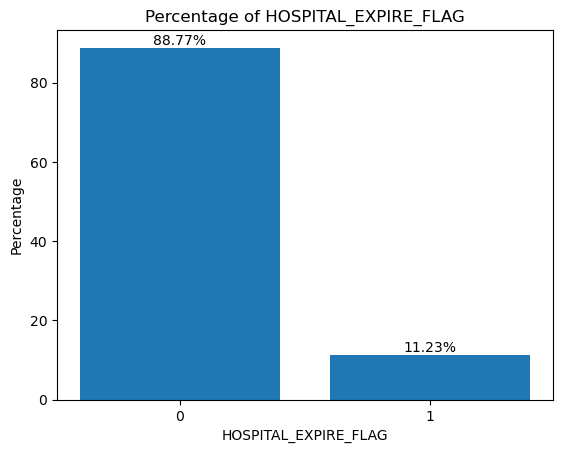

In [187]:

variable = train_data['HOSPITAL_EXPIRE_FLAG']

# Count the occurrences of 0 and 1 in the variable
counts = variable.value_counts()

# Calculate percentages
total = counts.sum()
percentages = (counts / total) * 100

# Plot the histogram
plt.bar(percentages.index, percentages.values)

# Add labels and title
plt.xlabel('HOSPITAL_EXPIRE_FLAG')
plt.ylabel('Percentage')
plt.title('Percentage of HOSPITAL_EXPIRE_FLAG')

# Add annotations for percentages
for i, percentage in enumerate(percentages):
    plt.text(percentages.index[i], percentage, f'{percentage:.2f}%', ha='center', va='bottom')

# Set x-axis ticks to match the unique values in the variable
plt.xticks(percentages.index)

# Show plot
plt.show()



We could see that 88,77% of the pacients survived and 12% die, so we are analyzing an unbalanced class

SEE THE MOST COMMON ILLNESS 

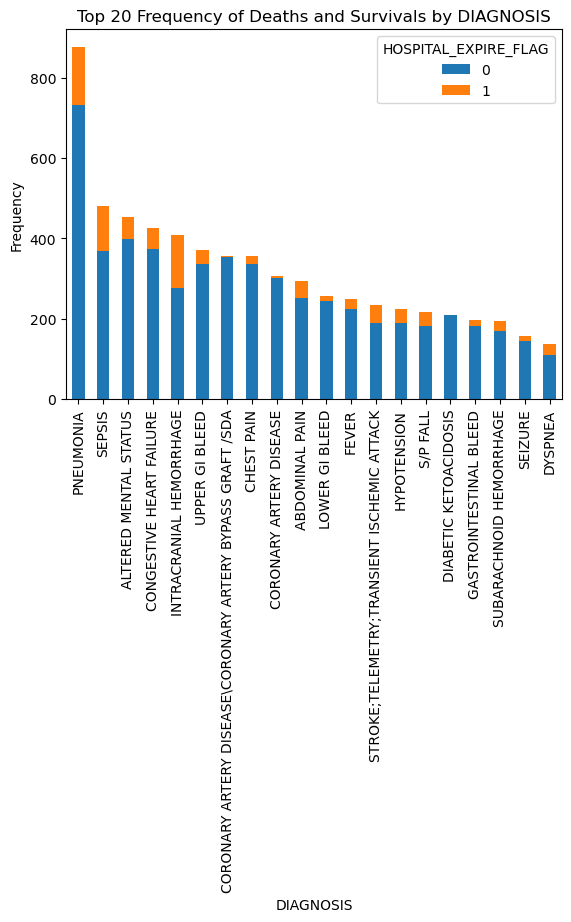

In [188]:

# Group by DIAGNOSIS and HOSPITAL_EXPIRE_FLAG, then count the occurrences
grouped = train_data.groupby(['DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG']).size().unstack(fill_value=0)

# Calculate the total occurrences for each diagnosis
grouped['Total'] = grouped.sum(axis=1)

# Sort the DataFrame by Total in descending order and select the top 20 rows
grouped_top_20 = grouped.sort_values(by='Total', ascending=False).head(20)

# Plot the top 20 data
grouped_top_20.drop(columns='Total').plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('DIAGNOSIS')
plt.ylabel('Frequency')
plt.title('Top 20 Frequency of Deaths and Survivals by DIAGNOSIS')

# Show the plot
plt.show()

We could see that pneumonia, sepsis and altered mental status are mthe most common. 

SEE THE DISTRIBUTION OF THE NUMERICAL VARIABLES 

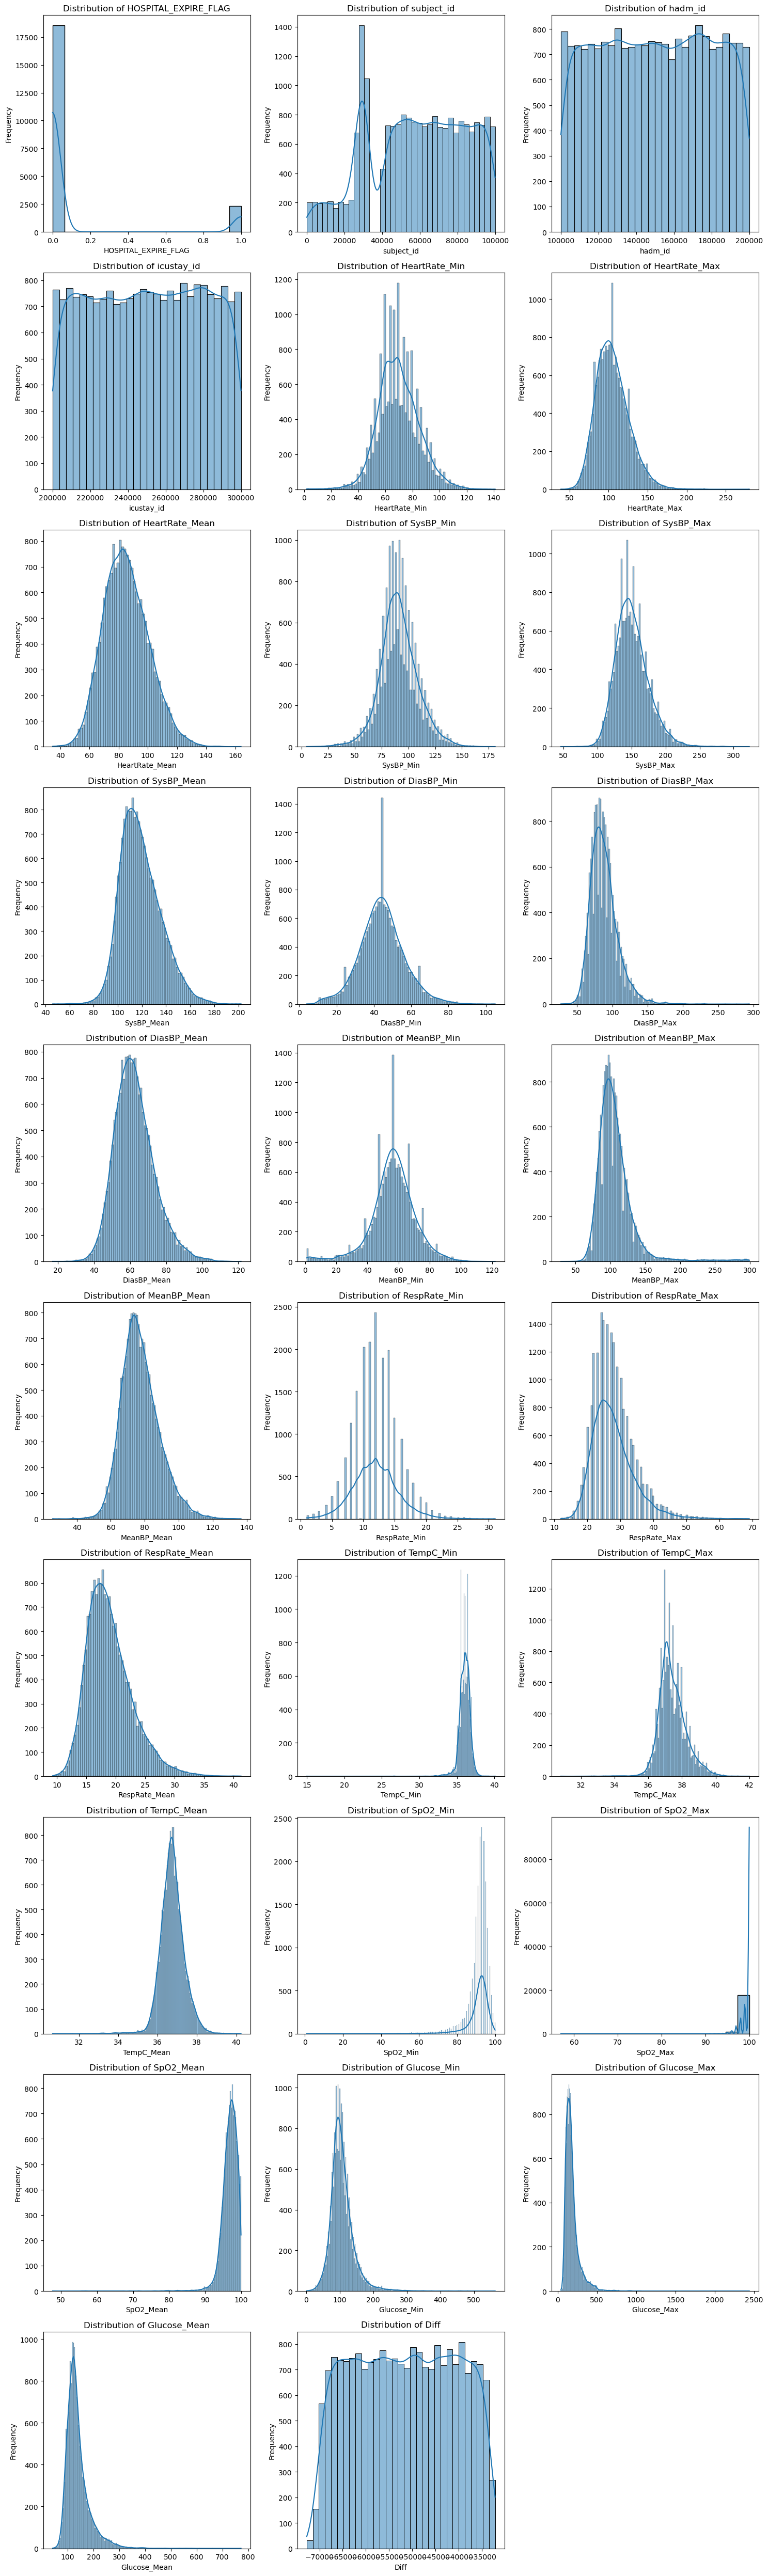

In [189]:
# Suppress FutureWarnings from Seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)
# Assuming train_data is your DataFrame containing numerical columns
numerical_cols = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64']]
num_cols = len(numerical_cols)
num_plots_per_row = 3
num_rows = (num_cols + num_plots_per_row - 1) // num_plots_per_row

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))

for i, col in enumerate(numerical_cols):
    row = i // num_plots_per_row
    col_idx = i % num_plots_per_row
    ax = axes[row, col_idx]
    sns.histplot(train_data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Remove any empty subplots
if num_cols % num_plots_per_row != 0:
    for ax in axes.flatten()[num_cols:]:
        ax.remove()

plt.tight_layout()
plt.show()


### 3. HANDLE MISSING VALUES

MISSING VALUES IMPUTE WITH THE MODE IN THE CATEGORICAL VARIABLES

In [190]:
# Identify categorical columns
categorical_cols_train = train_data.select_dtypes(include=['object']).columns

Nulls = train_data[categorical_cols_train].isnull().sum()

missing_data_cols = Nulls[Nulls > 0].index

print(missing_data_cols)

Index(['MARITAL_STATUS'], dtype='object')


We can see that just the category marital status has missing values which i am going to impute with the mode

In [191]:
#Because just marital status have missing values in the categorical variables i impute this one with the mode. 
train_data['MARITAL_STATUS'].fillna(train_data['MARITAL_STATUS'].mode()[0] , inplace=True)

# Check missing data
print(train_data[categorical_cols_train].isnull().sum().sum())

0


I repeat the same procedure for the test in the marital status variable

In [192]:
# Identify categorical columns
categorical_cols_train = test_data.select_dtypes(include=['object']).columns

Nulls = test_data[categorical_cols_train].isnull().sum()

missing_data_cols = Nulls[Nulls > 0].index
print(missing_data_cols)

Index(['MARITAL_STATUS'], dtype='object')


In [193]:
#Because just marital status have missing values in the categorical variables i impute this one with the mode of the train data.
test_data['MARITAL_STATUS'].fillna(train_data['MARITAL_STATUS'].mode()[0], inplace=True)

# Check missing data
print(test_data[categorical_cols_train].isnull().sum().sum())


0


THE MISSING VALUES IMPUTE WITH ITERATIVE IMPUTER  FOR THE NUMERICAL COLUMNS


The IterativeImputer predicts missing values based on other features in the dataset. In each iteration it treas one feature as target and the others as predictors, this continues until 20 which are the maximum number of iterations. 


I also tried to impute with the mean and knn imputer but the best resuls i obtained with iterative imputer.

In [194]:

# Identify numerical columns
numerical_cols_train = train_data.select_dtypes(include=['int', 'float']).columns

Nulls = train_data[numerical_cols_train].isnull().sum()
missing_data_cols = Nulls[Nulls > 0].index

print("Numerical columns with missing values:", missing_data_cols)

# Check if there are missing values in the selected numerical columns
print("Missing values in train_data:")
print(train_data[missing_data_cols].isnull().sum())

# Scale the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_data[missing_data_cols])
train_data.loc[:, missing_data_cols] = scaled_data

# Scale the numerical features in the test data using the scaler fitted on the training data
scaled_data_test = scaler.transform(test_data[missing_data_cols])
test_data.loc[:, missing_data_cols] = scaled_data_test

# Impute missing values with IterativeImputer for numerical columns
imputer = IterativeImputer(max_iter=20,random_state=0)
train_data[missing_data_cols] = imputer.fit_transform(train_data[missing_data_cols])

# Impute missing values in the test data using the imputer trained on the training data
test_data[missing_data_cols] = imputer.transform(test_data[missing_data_cols])

# Reverse the scaling process
train_data.loc[:, missing_data_cols] = scaler.inverse_transform(train_data[missing_data_cols])

# Reverse the scaling process for the test data
test_data.loc[:, missing_data_cols] = scaler.inverse_transform(test_data[missing_data_cols])

# Check missing data again
print("Missing values after imputation in train_data:")
print(train_data[missing_data_cols].isnull().sum().sum())


Numerical columns with missing values: Index(['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min',
       'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean',
       'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min',
       'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean',
       'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max',
       'Glucose_Mean'],
      dtype='object')
Missing values in train_data:
HeartRate_Min     2187
HeartRate_Max     2187
HeartRate_Mean    2187
SysBP_Min         2208
SysBP_Max         2208
SysBP_Mean        2208
DiasBP_Min        2209
DiasBP_Max        2209
DiasBP_Mean       2209
MeanBP_Min        2186
MeanBP_Max        2186
MeanBP_Mean       2186
RespRate_Min      2189
RespRate_Max      2189
RespRate_Mean     2189
TempC_Min         2497
TempC_Max         2497
TempC_Mean        2497
SpO2_Min          2203
SpO2_Max          2203
SpO2_Mean         2203
Glucose_Min        253
Glucose_Ma

c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Missing values after imputation in train_data:
0


### 4. HANDLING OUTLIERS

First of all i check the numerical columns excluding the target variable that has outliers, i choose IQR method because it is robust to extreme values.

In [195]:
def detect_outliers_iqr(data, column_name, threshold=1.5):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    return outliers

numerical_columns = train_data.select_dtypes(include=['int', 'float']).columns
numerical_columns = numerical_columns[numerical_columns != 'HOSPITAL_EXPIRE_FLAG']
outlier_columns = {}
for column in numerical_columns:
    outliers = detect_outliers_iqr(train_data, column)
    if not outliers.empty:
        outlier_columns[column] = outliers.shape[0]  # Number of outliers
        print(f"Column '{column}' has {outliers.shape[0]} outliers.")

print("Columns with outliers:", outlier_columns)

Column 'HeartRate_Min' has 532 outliers.
Column 'HeartRate_Max' has 449 outliers.
Column 'HeartRate_Mean' has 354 outliers.
Column 'SysBP_Min' has 885 outliers.
Column 'SysBP_Max' has 603 outliers.
Column 'SysBP_Mean' has 489 outliers.
Column 'DiasBP_Min' has 961 outliers.
Column 'DiasBP_Max' has 785 outliers.
Column 'DiasBP_Mean' has 658 outliers.
Column 'MeanBP_Min' has 1406 outliers.
Column 'MeanBP_Max' has 993 outliers.
Column 'MeanBP_Mean' has 688 outliers.
Column 'RespRate_Min' has 455 outliers.
Column 'RespRate_Max' has 908 outliers.
Column 'RespRate_Mean' has 683 outliers.
Column 'TempC_Min' has 673 outliers.
Column 'TempC_Max' has 977 outliers.
Column 'TempC_Mean' has 849 outliers.
Column 'SpO2_Min' has 1386 outliers.
Column 'SpO2_Max' has 2107 outliers.
Column 'SpO2_Mean' has 510 outliers.
Column 'Glucose_Min' has 946 outliers.
Column 'Glucose_Max' has 1403 outliers.
Column 'Glucose_Mean' has 1177 outliers.
Columns with outliers: {'HeartRate_Min': 532, 'HeartRate_Max': 449, '

### PLOT FOR OUTLIERS

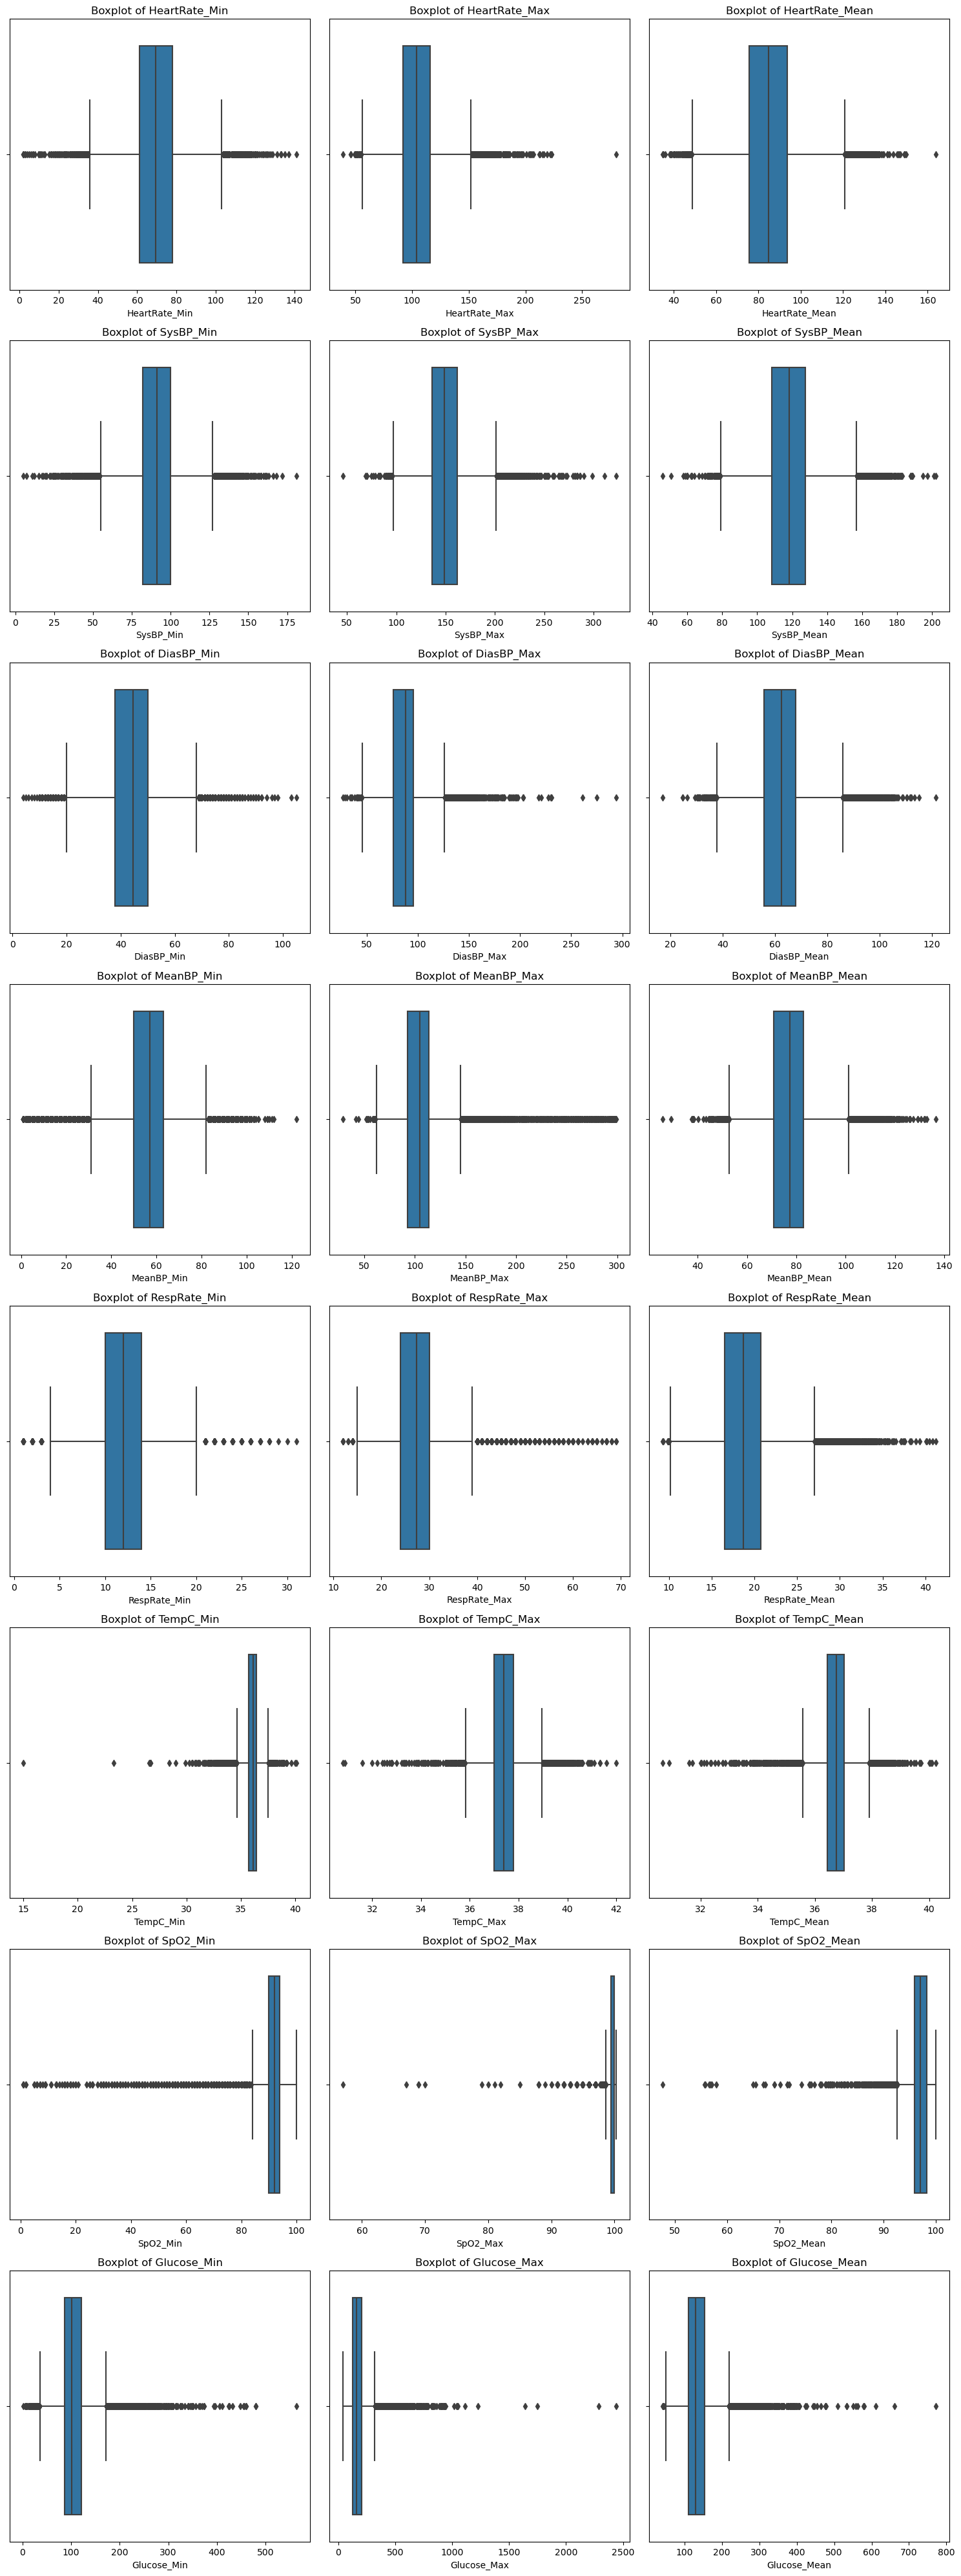

In [196]:

num_columns = len(outlier_columns)
num_rows = (num_columns + 2) // 3  # Ceiling division to ensure we have enough rows
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(outlier_columns):
    row_index = i // 3
    col_index = i % 3
    sns.boxplot(x=train_data[column], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Boxplot of {column}')

for i in range(num_columns, num_rows * 3):
    row_index = i // 3
    col_index = i % 3
    fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()


I decide to impute with the mean for the outliers.

In [197]:
def impute_outliers_with_mean(data, columns, outliers):
    for column_name in columns:
        # Calculate the mean excluding outliers
        filtered_data = data[~data.index.isin(outliers.index)]
        mean_without_outliers = filtered_data[column_name].mean()

        # Impute the mean to the outliers
        data.loc[outliers.index, column_name] = mean_without_outliers

    return data

# Example usage:
columns_to_impute = ['HeartRate_Min','HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 
                     'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min',
                       'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max', 'Glucose_Mean']  
# Add your list of columns here
train_data = impute_outliers_with_mean(train_data, columns_to_impute, outliers)

SEE THE DISTRIBUTION OF THE NUMERICAL VARIABLES AFTER THE TREATMENT OF THE OUTLIERS 

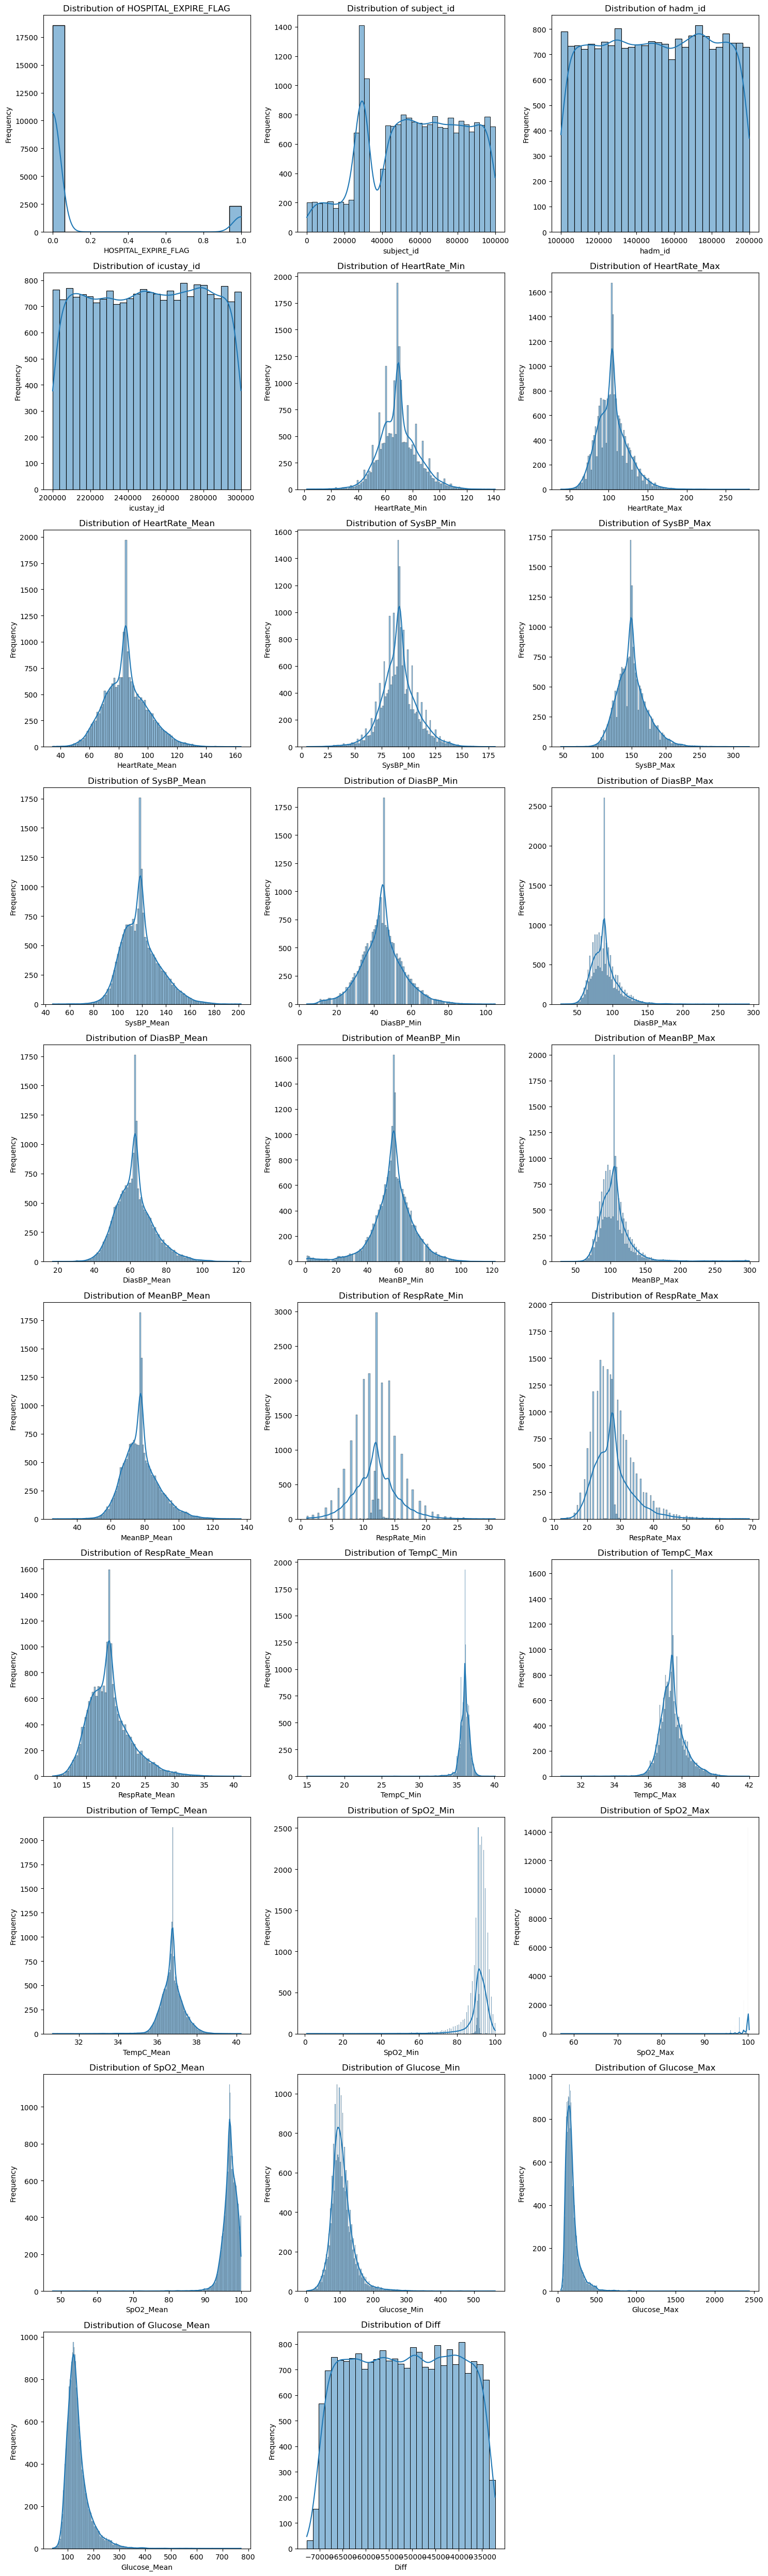

In [198]:
# Suppress FutureWarnings from Seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)
# Assuming train_data is your DataFrame containing numerical columns
numerical_cols = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64']]
num_cols = len(numerical_cols)
num_plots_per_row = 3
num_rows = (num_cols + num_plots_per_row - 1) // num_plots_per_row

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))

for i, col in enumerate(numerical_cols):
    row = i // num_plots_per_row
    col_idx = i % num_plots_per_row
    ax = axes[row, col_idx]
    sns.histplot(train_data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Remove any empty subplots
if num_cols % num_plots_per_row != 0:
    for ax in axes.flatten()[num_cols:]:
        ax.remove()

plt.tight_layout()
plt.show()

### 5. ENCODE CATEGORICAL VARIABLES 

##### RELIGION

In [199]:
#Grouping unobtainale and not sepcified in other and i group hebrew in jewish religion because the test data does not have hebrew. 
train_data['RELIGION'] = train_data['RELIGION'].replace(['UNOBTAINABLE', 'NOT SPECIFIED'], 'OTHER')
train_data['RELIGION'] = train_data['RELIGION'].replace(['HEBREW'], 'JEWISH')

#Grouping unobtainale and not sepcified in other. 
test_data['RELIGION'] = test_data['RELIGION'].replace(['UNOBTAINABLE', 'NOT SPECIFIED'], 'OTHER')

#### GENDER, ADMISSION_TYPE, INSURANCE, RELIGION, MARITAL STATUS, FIRST CARE UNIT

I am going to use one hot encoder for the features that has few categories.Gender (F,M),Admission_type (Emergency, elective and urgent),Insurance(Medicare, Private, Medicaird, Self Pay and Gobernment), Religion ('PROTESTANT QUAKER', 'OTHER', 'JEWISH', 'CATHOLIC', 'BUDDHIST','EPISCOPALIAN', 'ROMANIAN EAST. ORTH', 'GREEK ORTHODOX',"JEHOVAH'S WITNESS", 'MUSLIM', 'CHRISTIAN SCIENTIST', 'HINDU','7TH DAY ADVENTIST', 'UNITARIAN-UNIVERSALIST'), Marital status ('SINGLE', 'MARRIED', 'SEPARATED', 'WIDOWED', 'DIVORCED','UNKNOWN (DEFAULT)', 'LIFE PARTNER') and First care unit ('MICU', 'SICU', 'TSICU', 'CSRU', 'CCU')

In [200]:

encoded_admission_type  = ce.OneHotEncoder(cols=['GENDER','ADMISSION_TYPE','INSURANCE','RELIGION','MARITAL_STATUS','FIRST_CAREUNIT'], return_df=True)

train_data= encoded_admission_type .fit_transform(train_data)
test_data = encoded_admission_type .fit_transform(test_data)


#### AGE (USING DOB and ADMITTIME)

In [201]:
# Convert 'DOB' column to datetime objects and add timedelta from 'Diff' to 'DOB' to get realistic datetimes
train_data['Realistic_DOB'] = pd.to_datetime(train_data['DOB']) + pd.to_timedelta(train_data['Diff'], unit='D')
train_data['Realistic_ADMITTIME'] = train_data['ADMITTIME'] = pd.to_datetime(train_data['ADMITTIME'])+ pd.to_timedelta(train_data['Diff'], unit='D')


In [202]:
# Convert 'DOB' column to datetime objects and add timedelta from 'Diff' to 'DOB' to get realistic datetimes
test_data['Realistic_DOB'] = pd.to_datetime(test_data['DOB']) + pd.to_timedelta(test_data['Diff'], unit='D')
test_data['Realistic_ADMITTIME'] = test_data['ADMITTIME'] = pd.to_datetime(test_data['ADMITTIME'])+ pd.to_timedelta(test_data['Diff'], unit='D')


In [203]:
#Get the age 
train_data['Realistic_ADMITTIME'] = pd.to_datetime(train_data['Realistic_ADMITTIME'])
train_data['Realistic_DOB'] = pd.to_datetime(train_data['Realistic_DOB'])
train_data['Age'] = (train_data['Realistic_ADMITTIME'].dt.year - train_data['Realistic_DOB'].dt.year)


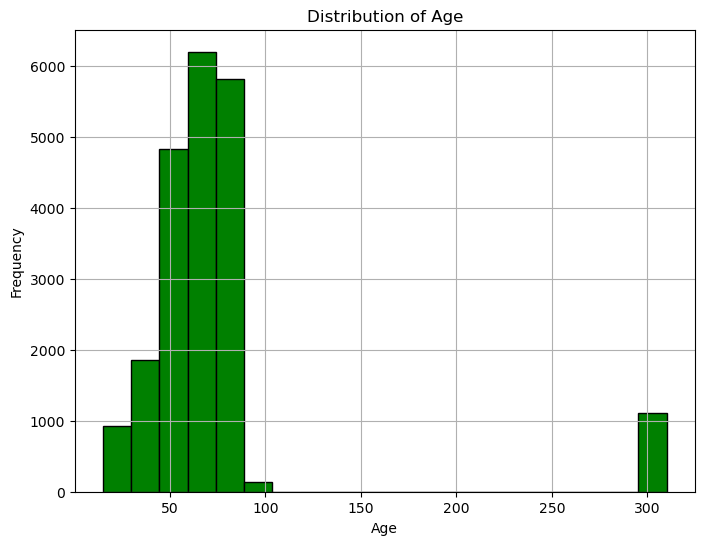

In [204]:


# Plotting the distribution of age
plt.figure(figsize=(8, 6))
plt.hist(train_data['Age'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [205]:
#Getting the mean of people that are less than 89 years and impute this mean in people over 89 

train_data.loc[train_data['Age'] > 89, 'Age'] = int(np.mean(train_data.loc[train_data['Age'] < 89, 'Age']))
train_data['Age']
#Drop 'DOB','Realistic_DOB','ADMITTIME','Realistic_ADMITTIME' because i just want to kee the column call Age that is when the pacient enters to the hospital 
train_data.drop(['DOB','Realistic_DOB','ADMITTIME','Realistic_ADMITTIME' ],axis=1, inplace=True)


I repeat for the test data

In [206]:
#Get the age 
test_data['Realistic_ADMITTIME'] = pd.to_datetime(test_data['Realistic_ADMITTIME'])
test_data['Realistic_DOB'] = pd.to_datetime(test_data['Realistic_DOB'])
test_data['Age'] = (test_data['Realistic_ADMITTIME'].dt.year - test_data['Realistic_DOB'].dt.year)

#Getting the mean of people that are less than 89 years and impute this mean in people over 89 

test_data.loc[test_data['Age'] > 89, 'Age'] = int(np.mean(train_data.loc[train_data['Age'] < 89, 'Age']))
test_data['Age']
#Drop 'DOB','Realistic_DOB','ADMITTIME','Realistic_ADMITTIME' because i just want to kee the column call Age that is when the pacient enters to the hospital 
test_data.drop(['DOB','Realistic_DOB','ADMITTIME','Realistic_ADMITTIME' ],axis=1, inplace=True)



ETHNICITY

I use binary encoder for ethnicity because this variable has high cardinality so this method reduce dimensionality.

In [207]:
ethnicity_encoder = ce.BinaryEncoder(cols=['ETHNICITY'],return_df=True)
train_data= ethnicity_encoder .fit_transform(train_data)
test_data = ethnicity_encoder .fit_transform(test_data)


ICD9_DIAGNOSIS

I add the extra data that contain the columns: SUBJECT_ID, HADM_ ID, seq_num and ICD9_code 

In [208]:
extra_data=pd.read_csv('MIMIC_diagnoses.csv')

First i pivot the dataframe to rearrange the data which i create unique combination of SUBJECT_ID and HADM_ID to form the index then the columns are formed by seq_ num and the values are filled with ICD9_code and then i merged with the original data. 

In [209]:
pivot_df = extra_data.pivot_table(index=['SUBJECT_ID', 'HADM_ID'], columns='SEQ_NUM', values='ICD9_CODE', aggfunc='first')

pivot_df.columns = [f'SEQ_NUM_{int(col)}' for col in pivot_df.columns]

pivot_df.reset_index(inplace=True)

train_data = pd.merge(train_data, pivot_df, how='left', left_on=['subject_id', 'hadm_id'], right_on=['SUBJECT_ID', 'HADM_ID'])

train_data.drop(columns=['SUBJECT_ID', 'HADM_ID'], inplace=True, errors='ignore')

test_data = pd.merge(test_data, pivot_df, how='left', left_on=['subject_id', 'hadm_id'], right_on=['SUBJECT_ID', 'HADM_ID'])

test_data.drop(columns=['SUBJECT_ID', 'HADM_ID'], inplace=True, errors='ignore')

In [210]:

# Identify the columns that start with 'SEQ_NUM'
icd9_code_columns = [col for col in train_data.columns if col.startswith('SEQ_NUM_')]

# Drop columns with more than 50% missing values
train_data = train_data.dropna(thresh=len(train_data) * 0.5, axis=1)
test_data = test_data.dropna(thresh=len(test_data) * 0.5, axis=1)

# Update icd9_code_columns after dropping columns
icd9_code_columns = [col for col in train_data.columns if col.startswith('SEQ_NUM_')]

# Initialize the target encoder
target_encoder_icd9 = ce.TargetEncoder(cols=icd9_code_columns, smoothing=0.3)

# Fit and transform the training data with the target encoder for 'SEQ_NUM' columns
train_data[icd9_code_columns] = target_encoder_icd9.fit_transform(train_data[icd9_code_columns], train_data['HOSPITAL_EXPIRE_FLAG'])

# Transform the test data with the trained encoder for 'SEQ_NUM' columns
test_data[icd9_code_columns] = target_encoder_icd9.transform(test_data[icd9_code_columns])


In other words is like a group by subject id and hadm_id and then there are 39 new columns because some patients in some hospitalization could have this number of illness, but this is not common to have this number, so for this columns i decide to drop the columns that have more than 50% of missing values, and then do target encoding because it fills the na with the mean, having just 14 columns which i am going to use to predict the models. 

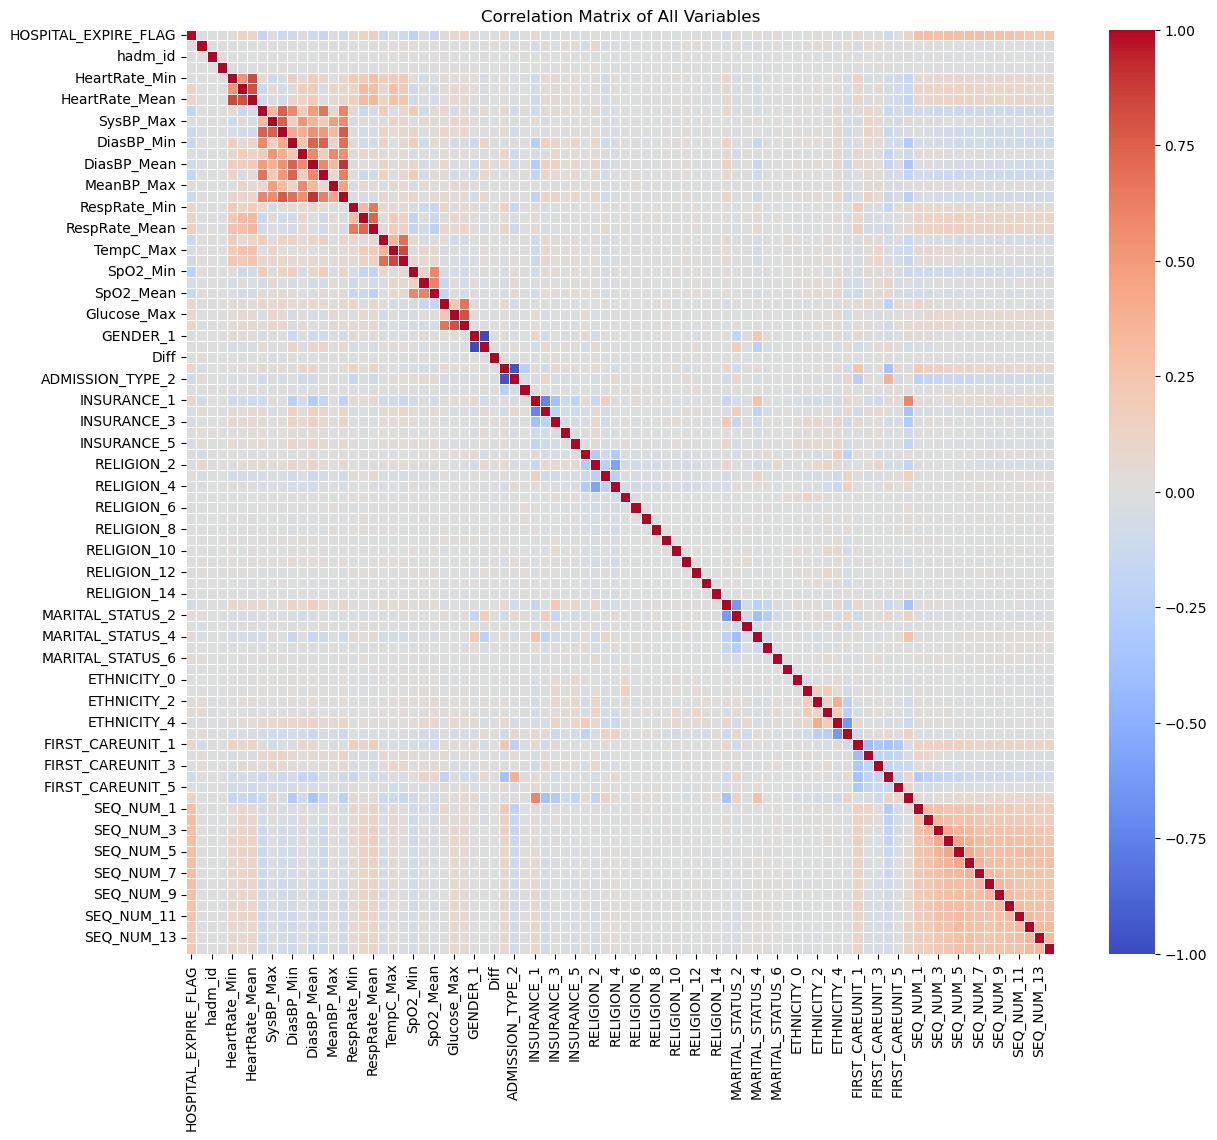

In [211]:
correlation_matrix = train_data.select_dtypes(include='number').corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of All Variables")
plt.show()  

In the correaltion matrix we could have an idea of the variables that are more correlated with hospital_expire_ flag which are the seq_num that we have already created, age, heartrate_max and mean  'RespRate_Min', 'RespRate_Max', 'RespRate_Mean',etc. 

### 6. MODELS

I use robustscaler because there are features that are not normally distributed. 

##### KNN 

I use robustscaler because it uses more robust estimates for the center and range of the data. 


In [212]:
# Scaling the data
scaler = preprocessing.RobustScaler()

In [213]:
#x_train are the x features for the train, x_test are the x features for the test and y_train the hospital_expire_flag
x_train = train_data.drop(['HOSPITAL_EXPIRE_FLAG','subject_id','hadm_id','icustay_id','DIAGNOSIS','ICD9_diagnosis'] ,axis=1) 
x_test=test_data.drop(['subject_id','hadm_id','icustay_id','DIAGNOSIS','ICD9_diagnosis'], axis=1)
y_train = train_data['HOSPITAL_EXPIRE_FLAG']

In [214]:
## Fitted to the training set
scaler.fit(x_train)

RobustScaler()

In [215]:
# Transform the x in train and test
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [216]:
# Selecting k best features
k_best_features = SelectKBest(score_func=f_classif, k=40)  # You can change k as needed

In [217]:
# Fit SelectKBest and transform features
k_best_features.fit(X_train_scaled, y_train)
x_train_selected = k_best_features.transform(X_train_scaled)
x_test_selected = k_best_features.transform(X_test_scaled)

In [218]:
# Get the indices of the selected features
selected_feature_indices = k_best_features.get_support(indices=True)

X_train=['HeartRate_Min',
 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean',
 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max',
 'Glucose_Mean', 'GENDER_1', 'GENDER_2', 'Diff', 'ADMISSION_TYPE_1', 'ADMISSION_TYPE_2', 'ADMISSION_TYPE_3', 'INSURANCE_1', 'INSURANCE_2', 'INSURANCE_3', 'INSURANCE_4',
 'INSURANCE_5', 'RELIGION_1', 'RELIGION_2', 'RELIGION_3', 'RELIGION_4', 'RELIGION_5', 'RELIGION_6', 'RELIGION_7', 'RELIGION_8', 'RELIGION_9', 'RELIGION_10', 'RELIGION_11',
 'RELIGION_12', 'RELIGION_13', 'RELIGION_14', 'MARITAL_STATUS_1', 'MARITAL_STATUS_2', 'MARITAL_STATUS_3', 'MARITAL_STATUS_4', 'MARITAL_STATUS_5', 'MARITAL_STATUS_6', 'MARITAL_STATUS_7',
 'ETHNICITY_0', 'ETHNICITY_1', 'ETHNICITY_2', 'ETHNICITY_3', 'ETHNICITY_4', 'ETHNICITY_5', 'FIRST_CAREUNIT_1', 'FIRST_CAREUNIT_2', 'FIRST_CAREUNIT_3', 'FIRST_CAREUNIT_4',
 'FIRST_CAREUNIT_5', 'Age', 'SEQ_NUM_1', 'SEQ_NUM_2', 'SEQ_NUM_3', 'SEQ_NUM_4', 'SEQ_NUM_5', 'SEQ_NUM_6', 'SEQ_NUM_7', 'SEQ_NUM_8', 'SEQ_NUM_9', 'SEQ_NUM_10',
 'SEQ_NUM_11', 'SEQ_NUM_12', 'SEQ_NUM_13', 'SEQ_NUM_14',
 ]
# Get the names of the selected features from custom feature names
selected_feature_names = [X_train[i] for i in selected_feature_indices]

# Print the names of the selected features
print("Names of selected features:", selected_feature_names)

Names of selected features: ['HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Mean', 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Mean', 'SpO2_Min', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max', 'Glucose_Mean', 'ADMISSION_TYPE_1', 'ADMISSION_TYPE_2', 'INSURANCE_1', 'INSURANCE_2', 'MARITAL_STATUS_1', 'FIRST_CAREUNIT_1', 'FIRST_CAREUNIT_4', 'Age', 'SEQ_NUM_1', 'SEQ_NUM_2', 'SEQ_NUM_3', 'SEQ_NUM_4', 'SEQ_NUM_5', 'SEQ_NUM_6', 'SEQ_NUM_7', 'SEQ_NUM_8', 'SEQ_NUM_9', 'SEQ_NUM_10', 'SEQ_NUM_11', 'SEQ_NUM_12', 'SEQ_NUM_13', 'SEQ_NUM_14']


In the grid search the optimal number of neighbors is 182. 
In the weights i try uniform which consider all points in each neighborhood are weighted equally and distance weight points by the inverse of their distance. 
In algorithm brute force considers the distances between a given point and all other points in the dataset and selecting the closest ones.Ball_tree organizes the data into a hierarchical structure that enables faster nearest neighboor in high dimensional spaces.

In [219]:
# KNN Classifier
MyKNN = KNeighborsClassifier()
grid_values = {'n_neighbors': [180, 182, 184], 'weights': ['uniform', 'distance'],'algorithm':['brute','ball_tree']}

# Grid Search
grid_knn_acc = GridSearchCV(MyKNN, param_grid=grid_values, scoring='roc_auc', cv=100, n_jobs=-1)
grid_knn_acc.fit(x_train_selected, y_train)



GridSearchCV(cv=100, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['brute', 'ball_tree'],
                         'n_neighbors': [180, 182, 184],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

best parameters: {'algorithm': 'brute', 'n_neighbors': 182, 'weights': 'distance'}
best score:      0.89961 (+/-0.02701)


,param_algorithm,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,...,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score,mean_test_score,std_test_score,rank_test_score
3,brute,182,distance,"{'algorithm': 'brute', 'n_neighbors': 182, 'we...",0.955353,0.863254,0.817438,0.905563,0.874942,0.936185,...,0.920564,0.896122,0.883431,0.885781,0.934430,0.929260,0.859224,0.899611,0.027015,1
9,ball_tree,182,distance,"{'algorithm': 'ball_tree', 'n_neighbors': 182,...",0.955353,0.863254,0.817438,0.905563,0.874942,0.936185,...,0.920564,0.896122,0.883431,0.885781,0.934430,0.929260,0.859224,0.899611,0.027015,1
1,brute,180,distance,"{'algorithm': 'brute', 'n_neighbors': 180, 'we...",0.953483,0.863488,0.816971,0.905330,0.874942,0.936185,...,0.920799,0.897062,0.882491,0.885546,0.934900,0.929495,0.858049,0.899483,0.027130,3
7,ball_tree,180,distance,"{'algorithm': 'ball_tree', 'n_neighbors': 180,...",0.953483,0.863488,0.816971,0.905330,0.874942,0.936185,...,0.920799,0.897062,0.882491,0.885546,0.934900,0.929495,0.858049,0.899483,0.027130,3
5,brute,184,distance,"{'algorithm': 'brute', 'n_neighbors': 184, 'we...",0.954885,0.862786,0.819074,0.905096,0.874240,0.935951,...,0.920094,0.897062,0.882726,0.885311,0.933960,0.929260,0.861575,0.899469,0.027018,5
11,ball_tree,184,distance,"{'algorithm': 'ball_tree', 'n_neighbors': 184,...",0.954885,0.862786,0.819074,0.905096,0.874240,0.935951,...,0.920094,0.897062,0.882726,0.885311,0.933960,0.929260,0.861575,0.899469,0.027018,5
0,brute,180,uniform,"{'algorithm': 'brute', 'n_neighbors': 180, 'we...",0.952314,0.858579,0.813464,0.904395,0.866643,0.935016,...,0.919154,0.895887,0.881669,0.884019,0.933960,0.927732,0.857932,0.898203,0.027332,7
6,ball_tree,180,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 180,...",0.952314,0.858579,0.813464,0.904395,0.866643,0.935016,...,0.919154,0.895887,0.881669,0.884019,0.933960,0.927732,0.857932,0.898203,0.027332,7
2,brute,182,uniform,"{'algorithm': 'brute', 'n_neighbors': 182, 'we...",0.953834,0.858579,0.813347,0.903109,0.867111,0.935016,...,0.918801,0.895417,0.882139,0.884019,0.933373,0.927732,0.858637,0.898196,0.027191,9
8,ball_tree,182,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 182,...",0.953834,0.858579,0.813347,0.903109,0.867111,0.935016,...,0.918801,0.895417,0.882139,0.884019,0.933373,0.927732,0.858637,0.898196,0.027191,9


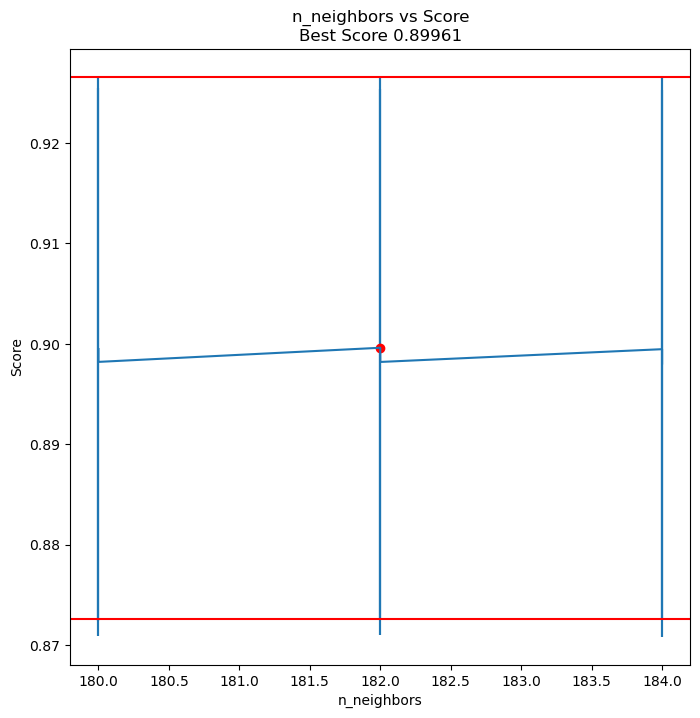

In [220]:
# Report best Number of Neighbors
GridSearch_table_plot(grid_knn_acc, "n_neighbors", negative=False, display_all_params=False)
#print('Best k parameter : '+ str(grid_knn_acc.best_estimator_.n_neighbors))
#print('Best weights parameter : '+ str(grid_knn_acc.best_estimator_.weights))

In [221]:
# Predictions
y_pred = grid_knn_acc.predict_proba(x_test_selected)

In [222]:
predicted_proba = y_pred[:, 1]

submission_df_KNN = pd.DataFrame({   'icustay_id': test_data['icustay_id'].values,
    'HOSPITAL_EXPIRE_FLAG': predicted_proba})

submission_df_KNN.to_csv('sub_knn_last.csv', index=False)

KNN SMOTE

In [223]:
# Scaling the data
scaler = preprocessing.RobustScaler()

In [224]:
#x_train are the x features for the train, x_test are the x features for the test and y_train the hospital_expire_flag
x_train = train_data.drop(['HOSPITAL_EXPIRE_FLAG','subject_id','hadm_id','icustay_id','DIAGNOSIS','ICD9_diagnosis'] ,axis=1) 
x_test=test_data.drop(['subject_id','hadm_id','icustay_id','DIAGNOSIS','ICD9_diagnosis'], axis=1)
y_train = train_data['HOSPITAL_EXPIRE_FLAG']

In [225]:
smt = SMOTETomek(sampling_strategy=0.30)
X_res, y_res = smt.fit_resample(x_train, y_train)

In [226]:
## Fitted to the training set
scaler.fit(X_res)

RobustScaler()

In [227]:
# Transform the x in train and test
X_train_scaled = scaler.transform(X_res)
X_test_scaled = scaler.transform(x_test)

In [228]:
# Selecting k best features
k_best_features = SelectKBest(score_func=f_classif, k=40)  # You can change k as needed

In [230]:
# Fit SelectKBest and transform features
k_best_features.fit(X_train_scaled, y_res)
x_train_selected = k_best_features.transform(X_train_scaled)
x_test_selected = k_best_features.transform(X_test_scaled)

In [231]:
# Get the indices of the selected features
selected_feature_indices = k_best_features.get_support(indices=True)

X_train=['HeartRate_Min',
 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean',
 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max',
 'Glucose_Mean', 'GENDER_1', 'GENDER_2', 'Diff', 'ADMISSION_TYPE_1', 'ADMISSION_TYPE_2', 'ADMISSION_TYPE_3', 'INSURANCE_1', 'INSURANCE_2', 'INSURANCE_3', 'INSURANCE_4',
 'INSURANCE_5', 'RELIGION_1', 'RELIGION_2', 'RELIGION_3', 'RELIGION_4', 'RELIGION_5', 'RELIGION_6', 'RELIGION_7', 'RELIGION_8', 'RELIGION_9', 'RELIGION_10', 'RELIGION_11',
 'RELIGION_12', 'RELIGION_13', 'RELIGION_14', 'MARITAL_STATUS_1', 'MARITAL_STATUS_2', 'MARITAL_STATUS_3', 'MARITAL_STATUS_4', 'MARITAL_STATUS_5', 'MARITAL_STATUS_6', 'MARITAL_STATUS_7',
 'ETHNICITY_0', 'ETHNICITY_1', 'ETHNICITY_2', 'ETHNICITY_3', 'ETHNICITY_4', 'ETHNICITY_5', 'FIRST_CAREUNIT_1', 'FIRST_CAREUNIT_2', 'FIRST_CAREUNIT_3', 'FIRST_CAREUNIT_4',
 'FIRST_CAREUNIT_5', 'Age', 'SEQ_NUM_1', 'SEQ_NUM_2', 'SEQ_NUM_3', 'SEQ_NUM_4', 'SEQ_NUM_5', 'SEQ_NUM_6', 'SEQ_NUM_7', 'SEQ_NUM_8', 'SEQ_NUM_9', 'SEQ_NUM_10',
 'SEQ_NUM_11', 'SEQ_NUM_12', 'SEQ_NUM_13', 'SEQ_NUM_14',
 ]
# Get the names of the selected features from custom feature names
selected_feature_names = [X_train[i] for i in selected_feature_indices]

# Print the names of the selected features
print("Names of selected features:", selected_feature_names)

Names of selected features: ['HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Mean', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Mean', 'SpO2_Min', 'SpO2_Mean', 'Glucose_Mean', 'GENDER_1', 'GENDER_2', 'ADMISSION_TYPE_1', 'ADMISSION_TYPE_2', 'INSURANCE_2', 'RELIGION_2', 'RELIGION_4', 'MARITAL_STATUS_1', 'ETHNICITY_4', 'FIRST_CAREUNIT_4', 'Age', 'SEQ_NUM_1', 'SEQ_NUM_2', 'SEQ_NUM_3', 'SEQ_NUM_4', 'SEQ_NUM_5', 'SEQ_NUM_6', 'SEQ_NUM_7', 'SEQ_NUM_8', 'SEQ_NUM_9', 'SEQ_NUM_10', 'SEQ_NUM_11', 'SEQ_NUM_12', 'SEQ_NUM_13', 'SEQ_NUM_14']


In [254]:
# KNN Classifier
MyKNN = KNeighborsClassifier()
grid_values = {'n_neighbors': [1,5,10], 'weights': ['uniform', 'distance'],'algorithm':['brute']}

# Grid Search
grid_knn_acc = GridSearchCV(MyKNN, param_grid=grid_values, scoring='roc_auc', cv=100, n_jobs=-1)
grid_knn_acc.fit(x_train_selected, y_res)

GridSearchCV(cv=100, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['brute'], 'n_neighbors': [1, 5, 10],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

best parameters: {'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'distance'}
best score:      0.95462 (+/-0.02306)


,param_algorithm,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,...,split93_test_score,split94_test_score,split95_test_score,split96_test_score,split97_test_score,split98_test_score,split99_test_score,mean_test_score,std_test_score,rank_test_score
3,brute,5,distance,"{'algorithm': 'brute', 'n_neighbors': 5, 'weig...",0.942829,0.938138,0.934839,0.907826,0.939272,0.932725,...,0.969936,0.967240,0.966204,0.958532,0.976467,0.988804,0.972527,0.954616,0.023062,1
5,brute,10,distance,"{'algorithm': 'brute', 'n_neighbors': 10, 'wei...",0.939891,0.931539,0.925817,0.914940,0.932467,0.934787,...,0.963716,0.963923,0.960346,0.948372,0.975327,0.977918,0.974394,0.952106,0.022791,2
2,brute,5,uniform,"{'algorithm': 'brute', 'n_neighbors': 5, 'weig...",0.928498,0.922982,0.915765,0.885607,0.925353,0.921177,...,0.955733,0.950135,0.950498,0.945107,0.960191,0.977970,0.959672,0.941278,0.025236,3
4,brute,10,uniform,"{'algorithm': 'brute', 'n_neighbors': 10, 'wei...",0.927415,0.918187,0.902413,0.896536,0.918445,0.920765,...,0.950446,0.937954,0.947802,0.937694,0.957755,0.964597,0.962575,0.937423,0.024506,4
0,brute,1,uniform,"{'algorithm': 'brute', 'n_neighbors': 1, 'weig...",0.884782,0.878338,0.904887,0.860450,0.892979,0.907877,...,0.929297,0.927742,0.912451,0.914006,0.928934,0.950912,0.920693,0.910264,0.028845,5
1,brute,1,distance,"{'algorithm': 'brute', 'n_neighbors': 1, 'weig...",0.884782,0.878338,0.904887,0.860450,0.892979,0.907877,...,0.929297,0.927742,0.912451,0.914006,0.928934,0.950912,0.920693,0.910264,0.028845,5


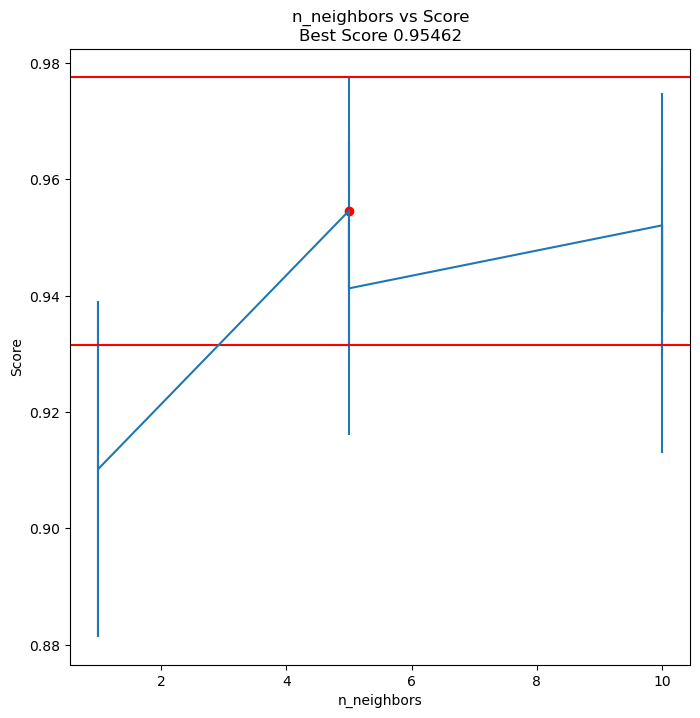

In [255]:
# Report best Number of Neighbors
GridSearch_table_plot(grid_knn_acc, "n_neighbors", negative=False, display_all_params=False)
#print('Best k parameter : '+ str(grid_knn_acc.best_estimator_.n_neighbors))
#print('Best weights parameter : '+ str(grid_knn_acc.best_estimator_.weights))

In [256]:
# Predictions
y_pred = grid_knn_acc.predict_proba(x_test_selected)

In [257]:
predicted_proba = y_pred[:, 1]

submission_df_KNN = pd.DataFrame({   'icustay_id': test_data['icustay_id'].values,
    'HOSPITAL_EXPIRE_FLAG': predicted_proba})

submission_df_KNN.to_csv('sub_knn_smote.last.csv', index=False)

In my case, sampling_strategy=0.30 means that after resampling, the ratio of the number of samples in the minority class to the majority class will be 0.30 (or 30%). This can help balance the class distribution in the dataset, here i got a better score but when i upload in kaggle it gets worst for that test data, may be this change in all the test set. 

NORMAL FOR SVC

In [169]:
#Scaling the data 
scaler = preprocessing.RobustScaler()


In [170]:
#x_train are the x features for the train, x_test are the x features for the test and y_train the hospital_expire_flag
x_train = train_data.drop(['HOSPITAL_EXPIRE_FLAG','subject_id','hadm_id','icustay_id','DIAGNOSIS','ICD9_diagnosis'] ,axis=1) 
x_test=test_data.drop(['subject_id','hadm_id','icustay_id','DIAGNOSIS','ICD9_diagnosis'], axis=1)
y_train = train_data['HOSPITAL_EXPIRE_FLAG']

In [171]:
## Fitted to the training set
scaler.fit(x_train)

RobustScaler()

In [172]:
# Transform the x in train and test
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [173]:
# Selecting k best features
k_best_features = SelectKBest(score_func=f_classif, k=40)  # You can change k as needed

In [174]:
# Fit SelectKBest and transform features
k_best_features.fit(X_train_scaled, y_train)
x_train_selected = k_best_features.transform(X_train_scaled)
x_test_selected = k_best_features.transform(X_test_scaled)

In [175]:
# Get the indices of the selected features
selected_feature_indices = k_best_features.get_support(indices=True)

X_train=['HeartRate_Min',
 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean',
 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max',
 'Glucose_Mean', 'GENDER_1', 'GENDER_2', 'Diff', 'ADMISSION_TYPE_1', 'ADMISSION_TYPE_2', 'ADMISSION_TYPE_3', 'INSURANCE_1', 'INSURANCE_2', 'INSURANCE_3', 'INSURANCE_4',
 'INSURANCE_5', 'RELIGION_1', 'RELIGION_2', 'RELIGION_3', 'RELIGION_4', 'RELIGION_5', 'RELIGION_6', 'RELIGION_7', 'RELIGION_8', 'RELIGION_9', 'RELIGION_10', 'RELIGION_11',
 'RELIGION_12', 'RELIGION_13', 'RELIGION_14', 'MARITAL_STATUS_1', 'MARITAL_STATUS_2', 'MARITAL_STATUS_3', 'MARITAL_STATUS_4', 'MARITAL_STATUS_5', 'MARITAL_STATUS_6', 'MARITAL_STATUS_7',
 'ETHNICITY_0', 'ETHNICITY_1', 'ETHNICITY_2', 'ETHNICITY_3', 'ETHNICITY_4', 'ETHNICITY_5', 'FIRST_CAREUNIT_1', 'FIRST_CAREUNIT_2', 'FIRST_CAREUNIT_3', 'FIRST_CAREUNIT_4',
 'FIRST_CAREUNIT_5', 'Age', 'SEQ_NUM_1', 'SEQ_NUM_2', 'SEQ_NUM_3', 'SEQ_NUM_4', 'SEQ_NUM_5', 'SEQ_NUM_6', 'SEQ_NUM_7', 'SEQ_NUM_8', 'SEQ_NUM_9', 'SEQ_NUM_10',
 'SEQ_NUM_11', 'SEQ_NUM_12', 'SEQ_NUM_13', 'SEQ_NUM_14',
 ]
# Get the names of the selected features from custom feature names
selected_feature_names = [X_train[i] for i in selected_feature_indices]

# Print the names of the selected features
print("Names of selected features:", selected_feature_names)

Names of selected features: ['HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Mean', 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Mean', 'SpO2_Min', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max', 'Glucose_Mean', 'ADMISSION_TYPE_1', 'ADMISSION_TYPE_2', 'INSURANCE_1', 'INSURANCE_2', 'MARITAL_STATUS_1', 'FIRST_CAREUNIT_1', 'FIRST_CAREUNIT_4', 'Age', 'SEQ_NUM_1', 'SEQ_NUM_2', 'SEQ_NUM_3', 'SEQ_NUM_4', 'SEQ_NUM_5', 'SEQ_NUM_6', 'SEQ_NUM_7', 'SEQ_NUM_8', 'SEQ_NUM_9', 'SEQ_NUM_10', 'SEQ_NUM_11', 'SEQ_NUM_12', 'SEQ_NUM_13', 'SEQ_NUM_14']


In [176]:
MySvc = SVC(probability=True,class_weight='balanced')

grid_values = {'C':[0.01,0.05,0.07],'degree':[1,2],'gamma':[0.008,0.01,0.05],'kernel':['linear','poly']} # automatic gamma will be gamma=1/num_features

grid_svc_acc = GridSearchCV(MySvc, param_grid = grid_values,scoring = 'roc_auc', cv=5,n_jobs=-1)


grid_svc_acc.fit(x_train_selected, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', probability=True),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.07], 'degree': [1, 2],
                         'gamma': [0.008, 0.01, 0.05],
                         'kernel': ['linear', 'poly']},
             scoring='roc_auc')

best parameters: {'C': 0.05, 'degree': 1, 'gamma': 0.008, 'kernel': 'linear'}
best score:      0.90209 (+/-0.00589)


,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
18,0.05,2,0.008,linear,"{'C': 0.05, 'degree': 2, 'gamma': 0.008, 'kern...",0.897560,0.895061,0.900792,0.911602,0.905438,0.902091,0.005887,1
16,0.05,1,0.05,linear,"{'C': 0.05, 'degree': 1, 'gamma': 0.05, 'kerne...",0.897560,0.895061,0.900792,0.911602,0.905438,0.902091,0.005887,1
20,0.05,2,0.01,linear,"{'C': 0.05, 'degree': 2, 'gamma': 0.01, 'kerne...",0.897560,0.895061,0.900792,0.911602,0.905438,0.902091,0.005887,1
14,0.05,1,0.01,linear,"{'C': 0.05, 'degree': 1, 'gamma': 0.01, 'kerne...",0.897560,0.895061,0.900792,0.911602,0.905438,0.902091,0.005887,1
22,0.05,2,0.05,linear,"{'C': 0.05, 'degree': 2, 'gamma': 0.05, 'kerne...",0.897560,0.895061,0.900792,0.911602,0.905438,0.902091,0.005887,1
12,0.05,1,0.008,linear,"{'C': 0.05, 'degree': 1, 'gamma': 0.008, 'kern...",0.897560,0.895061,0.900792,0.911602,0.905438,0.902091,0.005887,1
24,0.07,1,0.008,linear,"{'C': 0.07, 'degree': 1, 'gamma': 0.008, 'kern...",0.897591,0.895054,0.900775,0.911623,0.905407,0.902090,0.005888,7
34,0.07,2,0.05,linear,"{'C': 0.07, 'degree': 2, 'gamma': 0.05, 'kerne...",0.897591,0.895054,0.900775,0.911623,0.905407,0.902090,0.005888,7
26,0.07,1,0.01,linear,"{'C': 0.07, 'degree': 1, 'gamma': 0.01, 'kerne...",0.897591,0.895054,0.900775,0.911623,0.905407,0.902090,0.005888,7
28,0.07,1,0.05,linear,"{'C': 0.07, 'degree': 1, 'gamma': 0.05, 'kerne...",0.897591,0.895054,0.900775,0.911623,0.905407,0.902090,0.005888,7


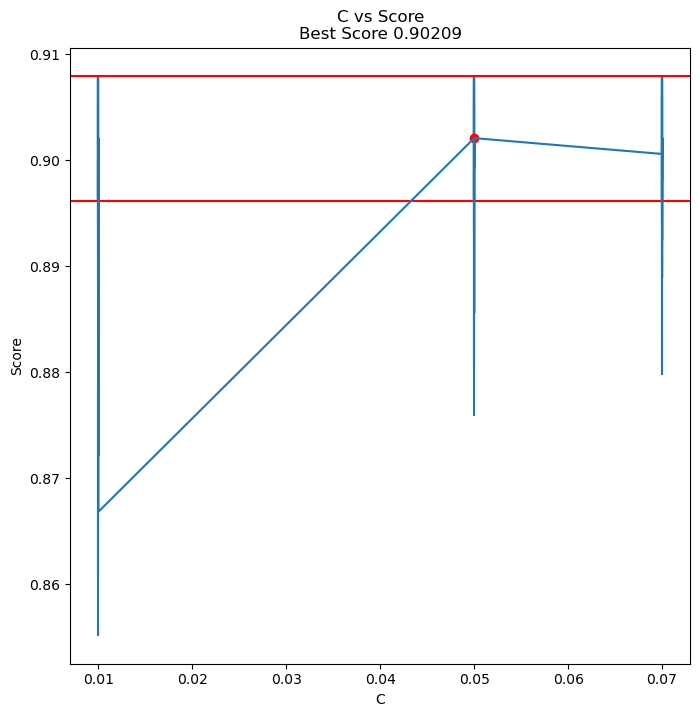

Best Cost parameter : 0.05
Best gamma parameter : 0.008


In [177]:
# Report best C and gamma
GridSearch_table_plot(grid_svc_acc, "C", negative=False, display_all_params=False)
print('Best Cost parameter : '+ str(grid_svc_acc.best_estimator_.C))
print('Best gamma parameter : '+ str(grid_svc_acc.best_estimator_.gamma))

In [178]:
#Predict values based on optimized parameters
y_pred_acc = grid_svc_acc.predict_proba(x_test_selected)
y_pred_train_acc = grid_svc_acc.predict_proba(  x_train_selected)

In [179]:
predicted_proba = y_pred_acc[:, 1]

submission_df_SVM = pd.DataFrame({   'icustay_id': test_data['icustay_id'].values,
    'HOSPITAL_EXPIRE_FLAG': predicted_proba})

submission_df_SVM.to_csv('sub_SVM_kbest_FINALVERSION.csv', index=False)

C is the regularization parameter and my best is 0.05. This indicates that the model prefers a relatively high margin and is tolerant for misclassifications. Lower C prevents overfitting when the data is not perfectly separable. This suggests that the decision boundary of the SVM might be smoother and less influenced by individual data points.

Degree is another parameter, but it's only considered for the polynomial kernel. The default value is 3, and it's not used for the linear kernel. Additionally, gamma is utilized for polynomial kernels. I chose to try both linear and polynomial kernels.

The linear kernel operates by computing the dot product of input samples, determining the cosine similarity between them. A higher dot product value signifies greater similarity between points. Employing a polynomial kernel is akin to generating PolynomialFeatures and subsequently fitting an SVC with a linear kernel on the transformed data.

By setting `probability=True`, I enabled the ability to use the `predict_proba` method. This functionality internally performs cross-validation to estimate probabilities for each class.

To address the issue of class imbalance within the dataset, I specified `class_weight='balanced'`. This adjustment entails modifying the weights of classes in an inversely proportional manner to their frequencies. This approach helps mitigate the impact of class imbalance during model training.

SMOTE 

In [258]:
#Scaling the data 
scaler = preprocessing.RobustScaler()

In [259]:
#x_train are the x features for the train, x_test are the x features for the test and y_train the hospital_expire_flag
x_train = train_data.drop(['HOSPITAL_EXPIRE_FLAG','subject_id','hadm_id','icustay_id','DIAGNOSIS','ICD9_diagnosis'] ,axis=1) 
x_test=test_data.drop(['subject_id','hadm_id','icustay_id','DIAGNOSIS','ICD9_diagnosis'], axis=1)
y_train = train_data['HOSPITAL_EXPIRE_FLAG']

In [260]:


smt = SMOTETomek(sampling_strategy=0.30)
X_res, y_res = smt.fit_resample(x_train, y_train)

In [261]:
## Fitted to the training set
scaler.fit(X_res)

RobustScaler()

In [262]:
# Transform the x in train and test
X_train_scaled = scaler.transform(X_res)
X_test_scaled = scaler.transform(x_test)

In [263]:
# Selecting k best features
k_best_features = SelectKBest(score_func=f_classif, k=40)  # You can change k as needed

In [264]:
# Fit SelectKBest and transform features
k_best_features.fit(X_train_scaled, y_res)
x_train_selected = k_best_features.transform(X_train_scaled)
x_test_selected = k_best_features.transform(X_test_scaled)

In [266]:
# Get the indices of the selected features
selected_feature_indices = k_best_features.get_support(indices=True)

X_train=['HeartRate_Min',
 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean',
 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max',
 'Glucose_Mean', 'GENDER_1', 'GENDER_2', 'Diff', 'ADMISSION_TYPE_1', 'ADMISSION_TYPE_2', 'ADMISSION_TYPE_3', 'INSURANCE_1', 'INSURANCE_2', 'INSURANCE_3', 'INSURANCE_4',
 'INSURANCE_5', 'RELIGION_1', 'RELIGION_2', 'RELIGION_3', 'RELIGION_4', 'RELIGION_5', 'RELIGION_6', 'RELIGION_7', 'RELIGION_8', 'RELIGION_9', 'RELIGION_10', 'RELIGION_11',
 'RELIGION_12', 'RELIGION_13', 'RELIGION_14', 'MARITAL_STATUS_1', 'MARITAL_STATUS_2', 'MARITAL_STATUS_3', 'MARITAL_STATUS_4', 'MARITAL_STATUS_5', 'MARITAL_STATUS_6', 'MARITAL_STATUS_7',
 'ETHNICITY_0', 'ETHNICITY_1', 'ETHNICITY_2', 'ETHNICITY_3', 'ETHNICITY_4', 'ETHNICITY_5', 'FIRST_CAREUNIT_1', 'FIRST_CAREUNIT_2', 'FIRST_CAREUNIT_3', 'FIRST_CAREUNIT_4',
 'FIRST_CAREUNIT_5', 'Age', 'SEQ_NUM_1', 'SEQ_NUM_2', 'SEQ_NUM_3', 'SEQ_NUM_4', 'SEQ_NUM_5', 'SEQ_NUM_6', 'SEQ_NUM_7', 'SEQ_NUM_8', 'SEQ_NUM_9', 'SEQ_NUM_10',
 'SEQ_NUM_11', 'SEQ_NUM_12', 'SEQ_NUM_13', 'SEQ_NUM_14',
 ]
# Get the names of the selected features from custom feature names
selected_feature_names = [X_train[i] for i in selected_feature_indices]

# Print the names of the selected features
print("Names of selected features:", selected_feature_names)

Names of selected features: ['HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Mean', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Mean', 'SpO2_Min', 'SpO2_Mean', 'Glucose_Mean', 'GENDER_1', 'GENDER_2', 'ADMISSION_TYPE_1', 'ADMISSION_TYPE_2', 'INSURANCE_2', 'INSURANCE_3', 'RELIGION_4', 'MARITAL_STATUS_1', 'ETHNICITY_4', 'FIRST_CAREUNIT_4', 'Age', 'SEQ_NUM_1', 'SEQ_NUM_2', 'SEQ_NUM_3', 'SEQ_NUM_4', 'SEQ_NUM_5', 'SEQ_NUM_6', 'SEQ_NUM_7', 'SEQ_NUM_8', 'SEQ_NUM_9', 'SEQ_NUM_10', 'SEQ_NUM_11', 'SEQ_NUM_12', 'SEQ_NUM_13', 'SEQ_NUM_14']


For the Smote technique i select the linear kernel because was the best before 

In [275]:
MySvc = SVC(probability=True,class_weight='balanced')

grid_values = {'C':[0,1,0.5,1],'kernel':['linear']} # automatic gamma will be gamma=1/num_features

grid_svc_acc = GridSearchCV(MySvc, param_grid = grid_values,scoring = 'roc_auc', cv=5,n_jobs=-1)

grid_svc_acc.fit(x_train_selected, y_res)

c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "c:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\USUARIO\anaconda3\Lib\site-packag

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced', probability=True),
             n_jobs=-1, param_grid={'C': [0, 1, 0.5, 1], 'kernel': ['linear']},
             scoring='roc_auc')

best parameters: {'C': 1, 'kernel': 'linear'}
best score:      0.93423 (+/-0.03772)


,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,1,linear,"{'C': 1, 'kernel': 'linear'}",0.887296,0.888801,0.963203,0.965304,0.966528,0.934226,0.037722,1
3,1,linear,"{'C': 1, 'kernel': 'linear'}",0.887296,0.888801,0.963203,0.965304,0.966528,0.934226,0.037722,1
2,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",0.887595,0.888782,0.963036,0.964571,0.966198,0.934036,0.037450,3
0,0,linear,"{'C': 0, 'kernel': 'linear'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


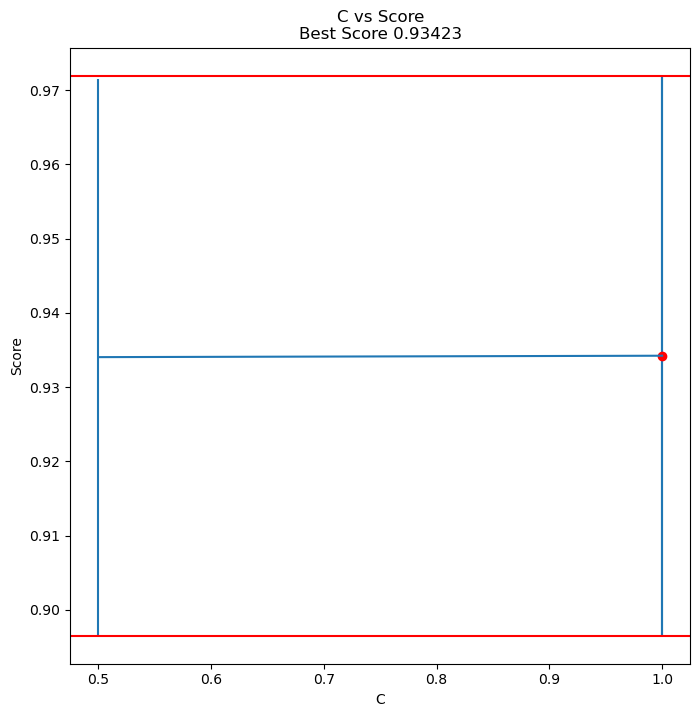

Best Cost parameter : 1
Best gamma parameter : scale


In [277]:
# Report best C and gamma
GridSearch_table_plot(grid_svc_acc, "C", negative=False, display_all_params=False)
print('Best Cost parameter : '+ str(grid_svc_acc.best_estimator_.C))
print('Best gamma parameter : '+ str(grid_svc_acc.best_estimator_.gamma))

We could see that there is almost a line between 0.5 and 1 in the line meaning that theres is not an improvement in the score, so i stop here and nor try news C because of this reason and takes a lot of time to run. In this case is not necessary because the score is not improving. 

In [278]:
#Predict values based on optimized parameters
y_pred_acc = grid_svc_acc.predict_proba(x_test_selected)
y_pred_train_acc = grid_svc_acc.predict_proba(  x_train_selected)

In [279]:
predicted_proba = y_pred_acc[:, 1]

submission_df_SVM = pd.DataFrame({   'icustay_id': test_data['icustay_id'].values,
    'HOSPITAL_EXPIRE_FLAG': predicted_proba})

submission_df_SVM.to_csv('sub_SVM_kbest__SMOTE_FINALVERSION.csv', index=False)

I tried smote but when i upload in kaggle the score goes down with that sample of the test, may be this change with the total sample. 